In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import style
import seaborn as sns
%matplotlib inline

import tensorflow as tf
from tensorflow import keras
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import ResNet50
from keras.callbacks import ReduceLROnPlateau
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop

style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

import random as rn
import time
import os
from tqdm import tqdm
import cv2
import random

from sklearn.preprocessing import LabelEncoder

np.random.seed(0)
rn.seed(0)

Using TensorFlow backend.


In [2]:
print(os.listdir("../Monkey species dataset/training/training"))
print(os.listdir("../Monkey species dataset/validation/validation"))

['n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9']
['n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9']


In [3]:
cols = ['Label','Latin Name', 'Common Name','Train Images', 'Validation Images']
labels = pd.read_csv("../Monkey species dataset/monkey_labels.txt", names=cols, skiprows=1)
labels

,Label,Latin Name,Common Name,Train Images,Validation Images
0,n0,alouatta_palliata\t,mantled_howler,131,26
1,n1,erythrocebus_patas\t,patas_monkey,139,28
2,n2,cacajao_calvus\t,bald_uakari,137,27
3,n3,macaca_fuscata\t,japanese_macaque,152,30
4,n4,cebuella_pygmea\t,pygmy_marmoset,131,26
5,n5,cebus_capucinus\t,white_headed_capuchin,141,28
6,n6,mico_argentatus\t,silvery_marmoset,132,26
7,n7,saimiri_sciureus\t,common_squirrel_monkey,142,28
8,n8,aotus_nigriceps\t,black_headed_night_monkey,133,27
9,n9,trachypithecus_johnii,nilgiri_langur,132,26


In [4]:
labels = labels['Common Name']
labels

0     mantled_howler                
1     patas_monkey                  
2     bald_uakari                   
3     japanese_macaque              
4     pygmy_marmoset                
5     white_headed_capuchin         
6     silvery_marmoset              
7     common_squirrel_monkey        
8     black_headed_night_monkey     
9     nilgiri_langur                
Name: Common Name, dtype: object

In [5]:
X_train =[]
Y_train =[]
X_test = []
Y_test = []
IMG_SIZE=150
n0_DIR_train='../Monkey species dataset/training/training/n0'
n1_DIR_train='../Monkey species dataset/training/training/n1'
n2_DIR_train='../Monkey species dataset/training/training/n2'
n3_DIR_train='../Monkey species dataset/training/training/n3'
n4_DIR_train='../Monkey species dataset/training/training/n4'
n5_DIR_train='../Monkey species dataset/training/training/n5'
n6_DIR_train='../Monkey species dataset/training/training/n6'
n7_DIR_train='../Monkey species dataset/training/training/n7'
n8_DIR_train='../Monkey species dataset/training/training/n8'
n9_DIR_train='../Monkey species dataset/training/training/n9'


n0_DIR_test='../Monkey species dataset/validation/validation/n0'
n1_DIR_test='../Monkey species dataset/validation/validation/n1'
n2_DIR_test='../Monkey species dataset/validation/validation/n2'
n3_DIR_test='../Monkey species dataset/validation/validation/n3'
n4_DIR_test='../Monkey species dataset/validation/validation/n4'
n5_DIR_test='../Monkey species dataset/validation/validation/n5'
n6_DIR_test='../Monkey species dataset/validation/validation/n6'
n7_DIR_test='../Monkey species dataset/validation/validation/n7'
n8_DIR_test='../Monkey species dataset/validation/validation/n8'
n9_DIR_test='../Monkey species dataset/validation/validation/n9'

In [6]:
def make_train_data(monkey_species,DIR):
    for img in tqdm(os.listdir(DIR)):
        label = monkey_species
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X_train.append(np.array(img))
        Y_train.append(str(label))

In [7]:
def make_test_data(monkey_species,DIR):
    for img in tqdm(os.listdir(DIR)):
        path = os.path.join(DIR,img)
        label = monkey_species
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        
        X_test.append(np.array(img))
        Y_test.append(str(label))

In [8]:
make_train_data(labels[0],n0_DIR_train)
print(len(X_train))

100%|████████████████████████████████████████████████████████████████████████████████| 105/105 [00:07<00:00, 14.01it/s]

105


In [9]:
make_train_data(labels[1],n1_DIR_train)
print(len(X_train))

100%|████████████████████████████████████████████████████████████████████████████████| 111/111 [00:14<00:00,  7.42it/s]

216


In [10]:
make_train_data(labels[2],n2_DIR_train)
print(len(X_train))

100%|████████████████████████████████████████████████████████████████████████████████| 110/110 [00:08<00:00, 13.09it/s]

326


In [11]:
make_train_data(labels[3],n3_DIR_train)
print(len(X_train))

100%|████████████████████████████████████████████████████████████████████████████████| 122/122 [00:06<00:00, 19.78it/s]

448


In [12]:
make_train_data(labels[4],n4_DIR_train)
make_train_data(labels[5],n5_DIR_train)
make_train_data(labels[6],n6_DIR_train)
make_train_data(labels[7],n7_DIR_train)
make_train_data(labels[8],n8_DIR_train)
make_train_data(labels[9],n9_DIR_train)
print(len(X_train))

100%|████████████████████████████████████████████████████████████████████████████████| 106/106 [00:11<00:00,  9.63it/s]

1098


In [13]:
make_test_data(labels[0],n0_DIR_test)
make_test_data(labels[1],n1_DIR_test)
make_test_data(labels[2],n2_DIR_test)
make_test_data(labels[3],n3_DIR_test)
make_test_data(labels[4],n4_DIR_test)
make_test_data(labels[5],n5_DIR_test)
make_test_data(labels[6],n6_DIR_test)
make_test_data(labels[7],n7_DIR_test)
make_test_data(labels[8],n8_DIR_test)
make_test_data(labels[9],n9_DIR_test)
print(len(X_test))

100%|██████████████████████████████████████████████████████████████████████████████████| 26/26 [00:03<00:00,  8.62it/s]

272


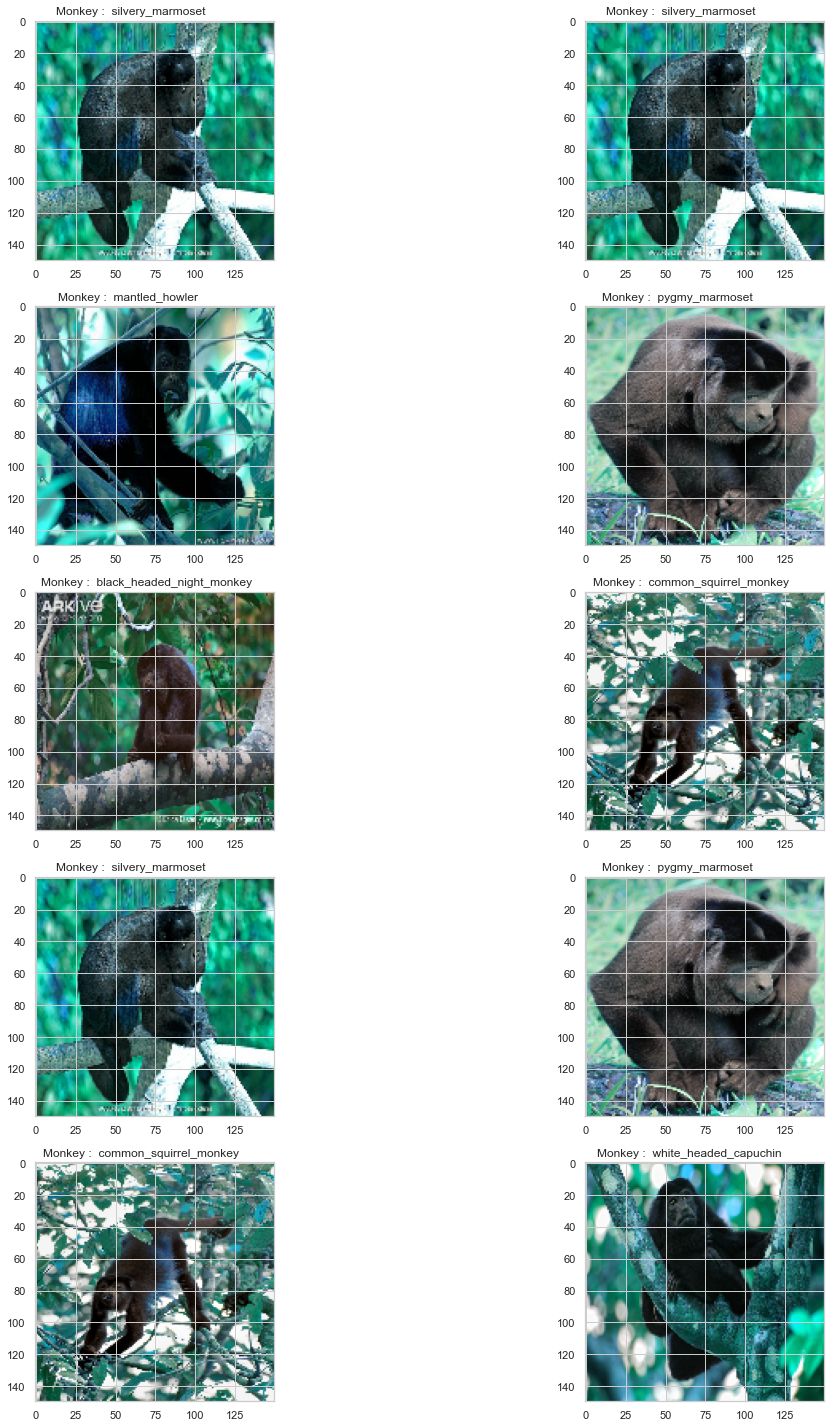

In [14]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(20,20)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(labels)-1)
        ax[i,j].imshow(X_train[l])
        ax[i,j].set_title('Monkey : '+labels[l])
        
plt.tight_layout()

In [15]:
le = LabelEncoder()
Y_train = le.fit_transform(Y_train)
Y_test = le.fit_transform(Y_test)
Y_train = to_categorical(Y_train,10)
Y_test = to_categorical(Y_test,10)

X_train = np.array(X_train)
X_test = np.array(X_test)
X_train = X_train/255
X_test = X_test/255

# Base Model :


In [16]:
base_model = VGG16(include_top=False, weights='imagenet',input_shape=(150,150,3), pooling='avg')

In [17]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [18]:
base_model.trainable=False

In [19]:
model= keras.Sequential()
model.add(base_model)
model.add(keras.layers.Dense(256,activation='relu'))
model.add(keras.layers.Dense(10,activation='sigmoid'))

In [16]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False  # randomly flip images
)

In [17]:
datagen.fit(X_train)

In [18]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1098, 150, 150, 3)
(272, 150, 150, 3)
(1098, 10)
(272, 10)


In [22]:
epochs = 10
batch_size=128
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 512)               14714688  
_________________________________________________________________
dense (Dense)                (None, 256)               131328    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 14,848,586
Trainable params: 133,898
Non-trainable params: 14,714,688
_________________________________________________________________


c:\python\python38\lib\site-packages\keras\callbacks\callbacks.py:998: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` instead.
  warnings.warn('`epsilon` argument is deprecated and '


In [25]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [26]:
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_test,Y_test),
                              verbose = 1, steps_per_epoch=X_train.shape[0] // batch_size)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
8/8 [==============================] - 132s 16s/step - loss: 2.2803 - accuracy: 0.1680 - val_loss: 2.2172 - val_accuracy: 0.2721
Epoch 2/10
8/8 [==============================] - 127s 16s/step - loss: 2.1479 - accuracy: 0.3814 - val_loss: 2.0456 - val_accuracy: 0.5147
Epoch 3/10
8/8 [==============================] - 120s 15s/step - loss: 1.9706 - accuracy: 0.4144 - val_loss: 1.8162 - val_accuracy: 0.5956
Epoch 4/10
8/8 [==============================] - 119s 15s/step - loss: 1.7369 - accuracy: 0.5938 - val_loss: 1.5827 - val_accuracy: 0.6654
Epoch 5/10
8/8 [==============================] - 119s 15s/step - loss: 1.5205 - accuracy: 0.6289 - val_loss: 1.3927 - val_accuracy: 0.6912
Epoch 6/10
8/8 [==============================] - 120s 15s/step - loss: 1.3344 - accuracy: 0.6732 - val_loss: 1.2192 - val_accuracy: 0.7279
Epoch 7/10
8/8 [==============================] - 119s 15s/step - loss: 1.2357 - acc

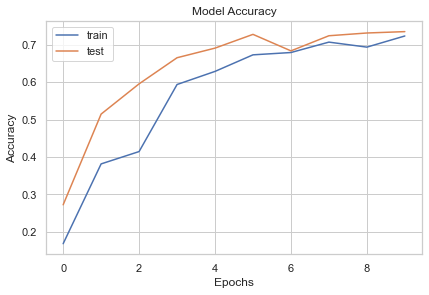

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

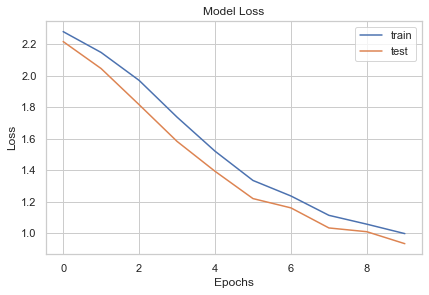

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

# Predictions :

In [30]:
pred = model.predict(X_test)
pred_digits = np.argmax(pred,axis=1)

In [37]:
i=0
prop_class=[]
mis_class=[]

for i in range(len(Y_test)):
    if(np.argmax(Y_test[i])==pred_digits[i]):
        prop_class.append(i)
    if(len(prop_class)==8):
        break

i=0
for i in range(len(Y_test)):
    if(not np.argmax(Y_test[i])==pred_digits[i]):
        mis_class.append(i)
    if(len(mis_class)==8):
        break

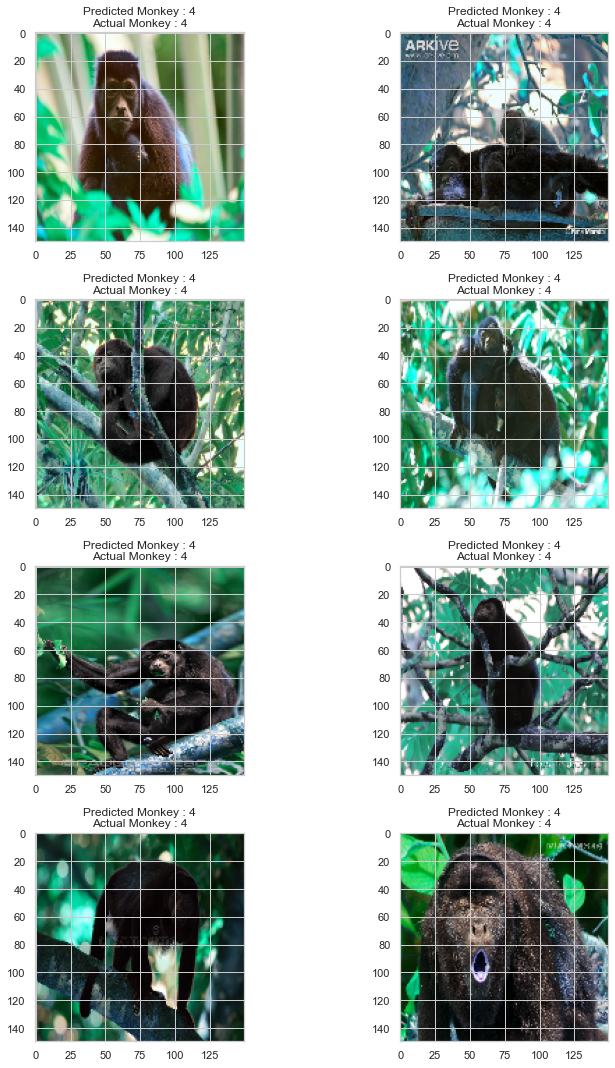

In [39]:
count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(X_test[prop_class[count]])
        ax[i,j].set_title("Predicted Monkey : "+str(pred_digits[prop_class[count]])+"\n"+"Actual Monkey : "+str(np.argmax(Y_test[prop_class[count]])))
        plt.tight_layout()
        count+=1

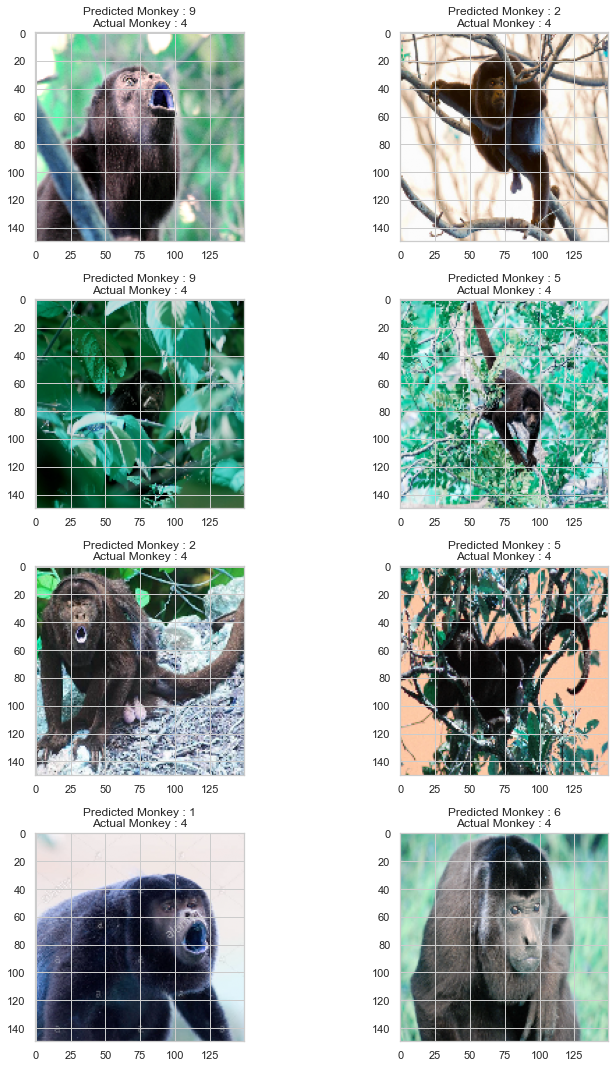

In [41]:
count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(X_test[mis_class[count]])
        ax[i,j].set_title("Predicted Monkey : "+str(pred_digits[mis_class[count]])+"\n"+"Actual Monkey : "+str(np.argmax(Y_test[mis_class[count]])))
        plt.tight_layout()
        count+=1